# 0. Prepare data

In [1]:
import math
import numpy as np
import pandas as pd
from rdkit import Chem
import sys
sys.path.append('Mol2DSimi')
from Similarity import similarity_calculate
from enrichment_factor import Enrichment_Factor
from validation import  similarity_validation

In [2]:
# Active/decoy data
data = pd.read_excel("Data/Apelin_search_standard.xlsx",)
data[['ID', 'Active', 'SMILES']] = data['ID,Active,SMILES'].str.split(',', expand=True)
data['CanonSmiles'] = data['SMILES'].apply(Chem.CanonSmiles)
data['Molecule'] = data['CanonSmiles'].apply(Chem.MolFromSmiles)
data.drop(['ID,Active,SMILES', 'SMILES'], axis =1, inplace = True)
data.head(2)

,ID,Active,CanonSmiles,Molecule
0,Active_1,1,CC[C@H](C)[C@@H](CC(=O)O)NC(=O)c1ccc2c(c1)nc(C...,<rdkit.Chem.rdchem.Mol object at 0x7f51eaff8c80>
1,Active_2,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@H](CC(=O)O)...,<rdkit.Chem.rdchem.Mol object at 0x7f51eadc5c10>


In [3]:
# Query data
base_data = pd.read_csv('Data/similarity.csv')
base_data['CanonSmiles'] = base_data['smiles'].apply(Chem.CanonSmiles)
base_data['Molecule'] = base_data['CanonSmiles'].apply(Chem.MolFromSmiles)
base_data.drop(['smiles'], axis = 1, inplace = True)
base_data.head()

,ID,CanonSmiles,Molecule
0,CMF-019,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@H](CC(=O)O)...,<rdkit.Chem.rdchem.Mol object at 0x7f51ebb46890>
1,AMG 986,COc1cccc(OC)c1-n1c(NS(=O)(=O)[C@@H](C)[C@H](C)...,<rdkit.Chem.rdchem.Mol object at 0x7f51ebb46430>
2,BMS-986224,CCOCc1[nH]c(=O)c(-c2nnc(Cc3ccc(Cl)cn3)o2)c(O)c...,<rdkit.Chem.rdchem.Mol object at 0x7f51ebb46270>


# 1. Similarity Calculation

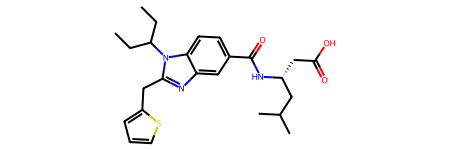

In [4]:
query = []
for _, idx, mol in base_data[["ID", "Molecule"]].itertuples():
    mol.SetProp("_Name", idx)
    query.append(mol)
query[0]

In [ ]:
for i in query:
    simi = similarity_calculate(data = data, query= i, smile_col="CanonSmiles", active_col='Active')
    simi.fit()
    simi.plot()

# 2. Enrichment plot

In [5]:
tani_col = ['tanimoto_avalon','tanimoto_maccs','tanimoto_ecfp2','tanimoto_ecfp4','tanimoto_ecfp6','tanimoto_map4',
 'tanimoto_fcfp2','tanimoto_fcfp4','tanimoto_fcfp6','tanimoto_rdk5','tanimoto_rdk6', 'tanimoto_rdk7',]

tanimoto_avalon


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_maccs


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp2


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp4


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp6


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_map4


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_fcfp2


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_fcfp4


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_fcfp6


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_rdk5


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_rdk6


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_rdk7


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


Experimental EF for 1% of ranked dataset (tanimoto_avalon): 6.3%
Experimental EF for 1% of ranked dataset (tanimoto_maccs): 6.3%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp2): 14.7%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp4): 20.8%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp6): 24.1%
Experimental EF for 1% of ranked dataset (tanimoto_map4): 1.2%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp2): 0.0%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp4): 1.0%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp6): 0.9%
Experimental EF for 1% of ranked dataset (tanimoto_rdk5): 7.3%
Experimental EF for 1% of ranked dataset (tanimoto_rdk6): 8.8%
Experimental EF for 1% of ranked dataset (tanimoto_rdk7): 6.1%
Random EF for 1% of ranked dataset: 1.0%
Optimal EF for 1% of ranked dataset: 50.3%


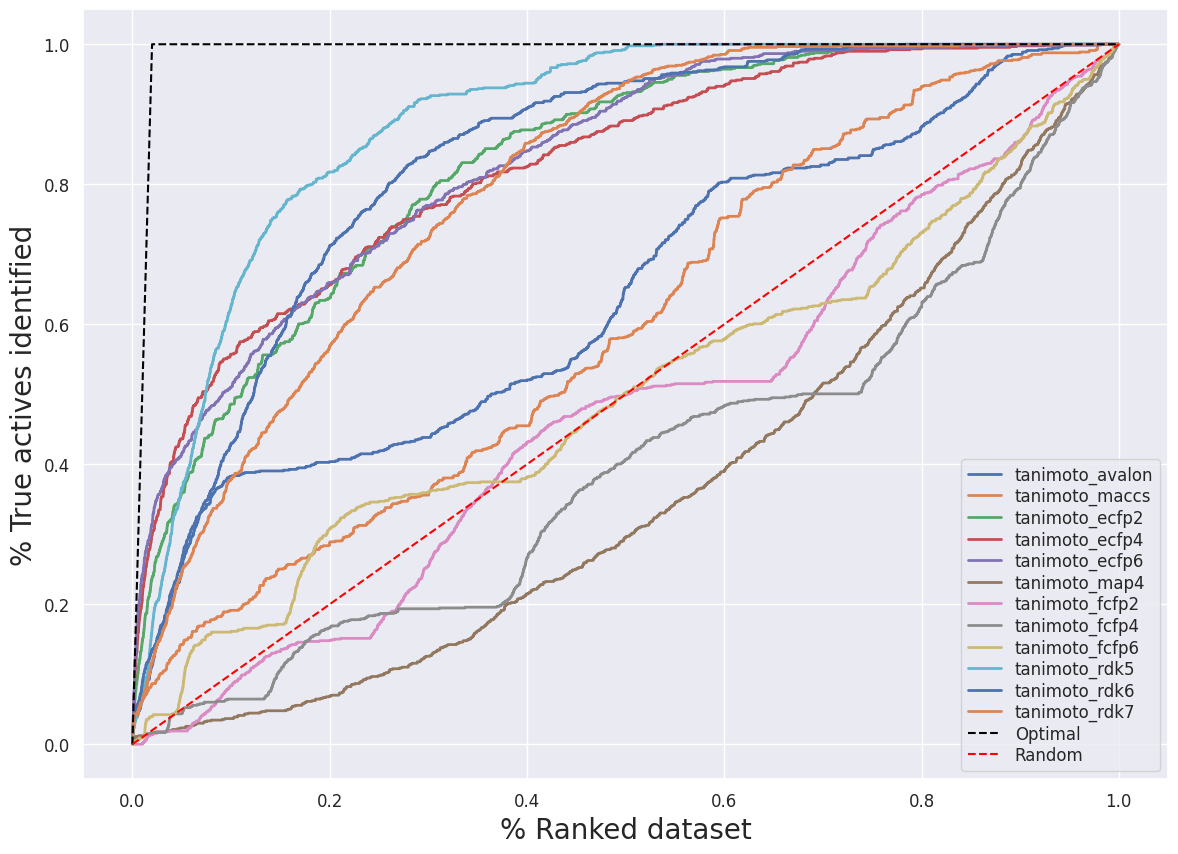

tanimoto_avalon


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_maccs


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp2


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp4


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp6


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_map4


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_fcfp2


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_fcfp4


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_fcfp6


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_rdk5


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_rdk6


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_rdk7


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


Experimental EF for 1% of ranked dataset (tanimoto_avalon): 4.4%
Experimental EF for 1% of ranked dataset (tanimoto_maccs): 6.2%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp2): 18.7%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp4): 22.1%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp6): 23.1%
Experimental EF for 1% of ranked dataset (tanimoto_map4): 3.9%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp2): 0.3%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp4): 0.6%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp6): 1.1%
Experimental EF for 1% of ranked dataset (tanimoto_rdk5): 6.8%
Experimental EF for 1% of ranked dataset (tanimoto_rdk6): 3.9%
Experimental EF for 1% of ranked dataset (tanimoto_rdk7): 4.1%
Random EF for 1% of ranked dataset: 1.0%
Optimal EF for 1% of ranked dataset: 50.3%


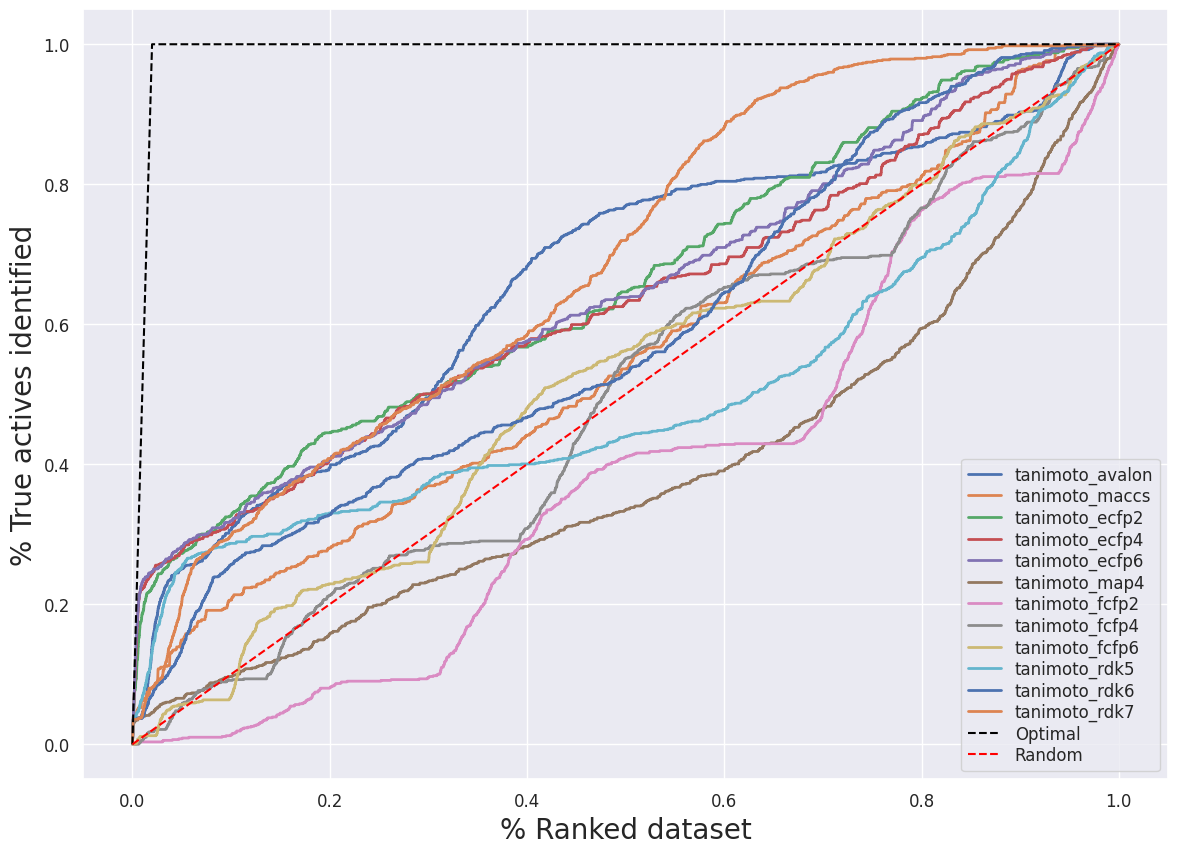

tanimoto_avalon


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_maccs


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp2


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp4


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp6


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_map4


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_fcfp2


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_fcfp4


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_fcfp6


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_rdk5


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_rdk6


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_rdk7


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


Experimental EF for 1% of ranked dataset (tanimoto_avalon): 27.1%
Experimental EF for 1% of ranked dataset (tanimoto_maccs): 27.0%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp2): 28.6%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp4): 34.1%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp6): 34.8%
Experimental EF for 1% of ranked dataset (tanimoto_map4): 11.2%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp2): 0.1%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp4): 0.1%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp6): 0.1%
Experimental EF for 1% of ranked dataset (tanimoto_rdk5): 36.0%
Experimental EF for 1% of ranked dataset (tanimoto_rdk6): 35.2%
Experimental EF for 1% of ranked dataset (tanimoto_rdk7): 33.0%
Random EF for 1% of ranked dataset: 1.0%
Optimal EF for 1% of ranked dataset: 50.3%


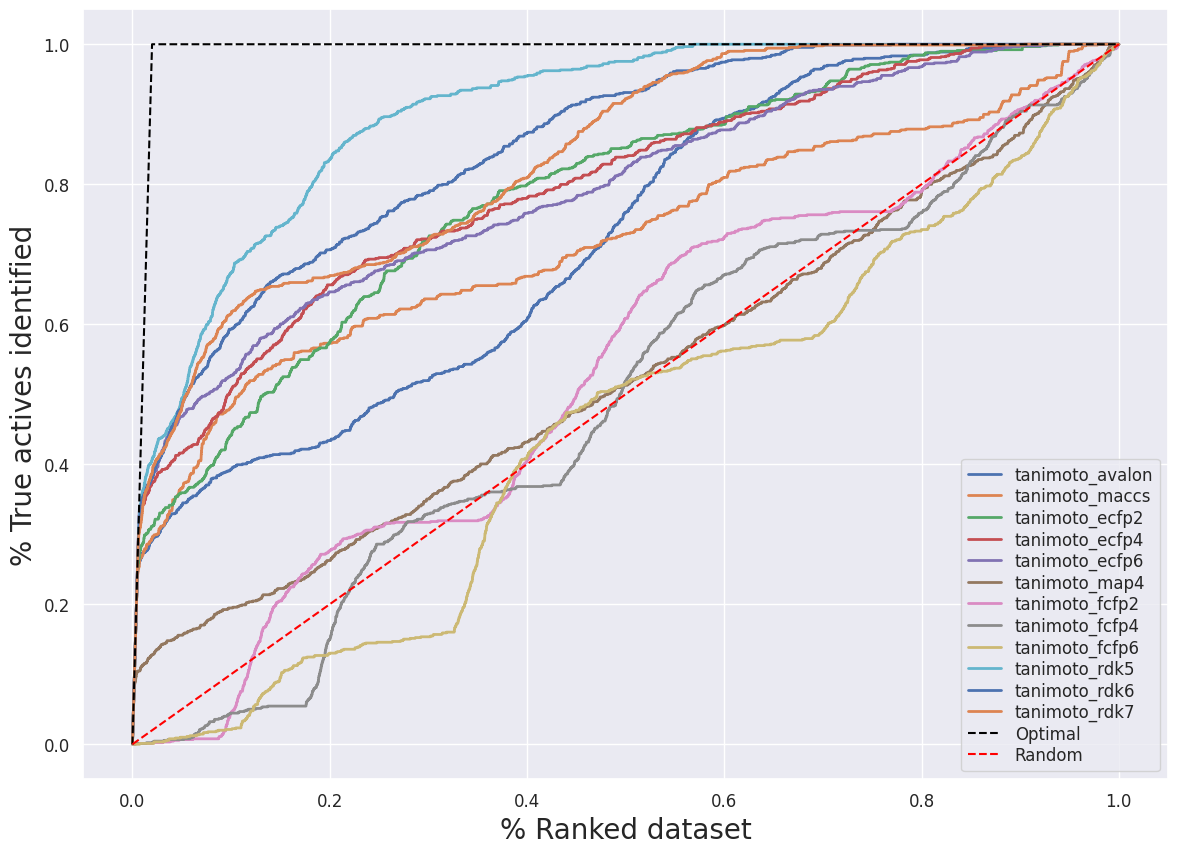

In [6]:
import glob
pBio_cutoff = .5
path = '/home/labhhc/Documents/Workspace/D18/TrucD18/Similarity/Data/Raw_data'
for i in glob.glob(f"{path}/*.csv"):
    data = pd.read_csv(i)
    data['Active']=data['Active'].astype('float')
    ef = Enrichment_Factor(data = data,similarity_measure= tani_col, pBio_cutoff=pBio_cutoff, 
                       active_col = 'Active', ranked_dataset_percentage_cutoff = 1
                      )
    ef.EF()
    ef.EF_calculate()
    ef.plot_EF()

# 3. Validation

<Figure size 1400x1000 with 0 Axes>

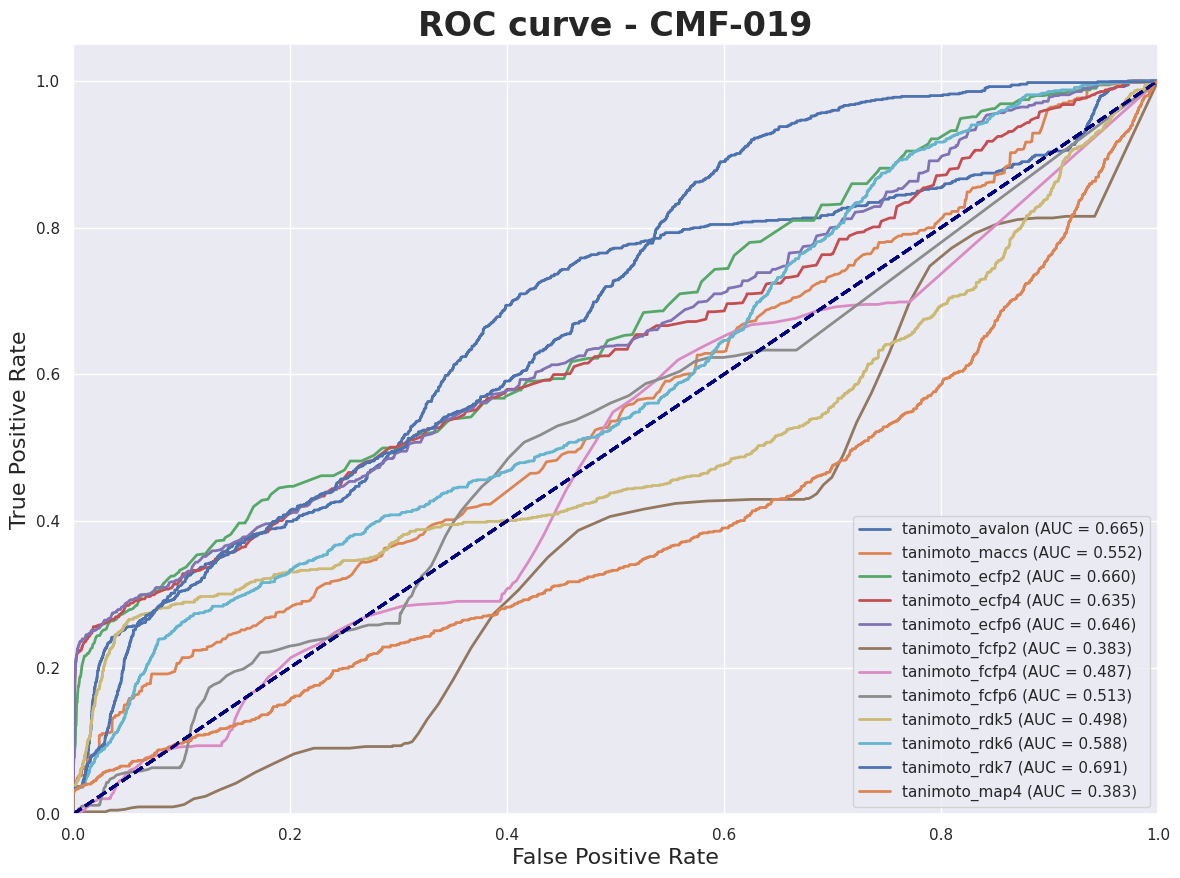

<Figure size 1400x1000 with 0 Axes>

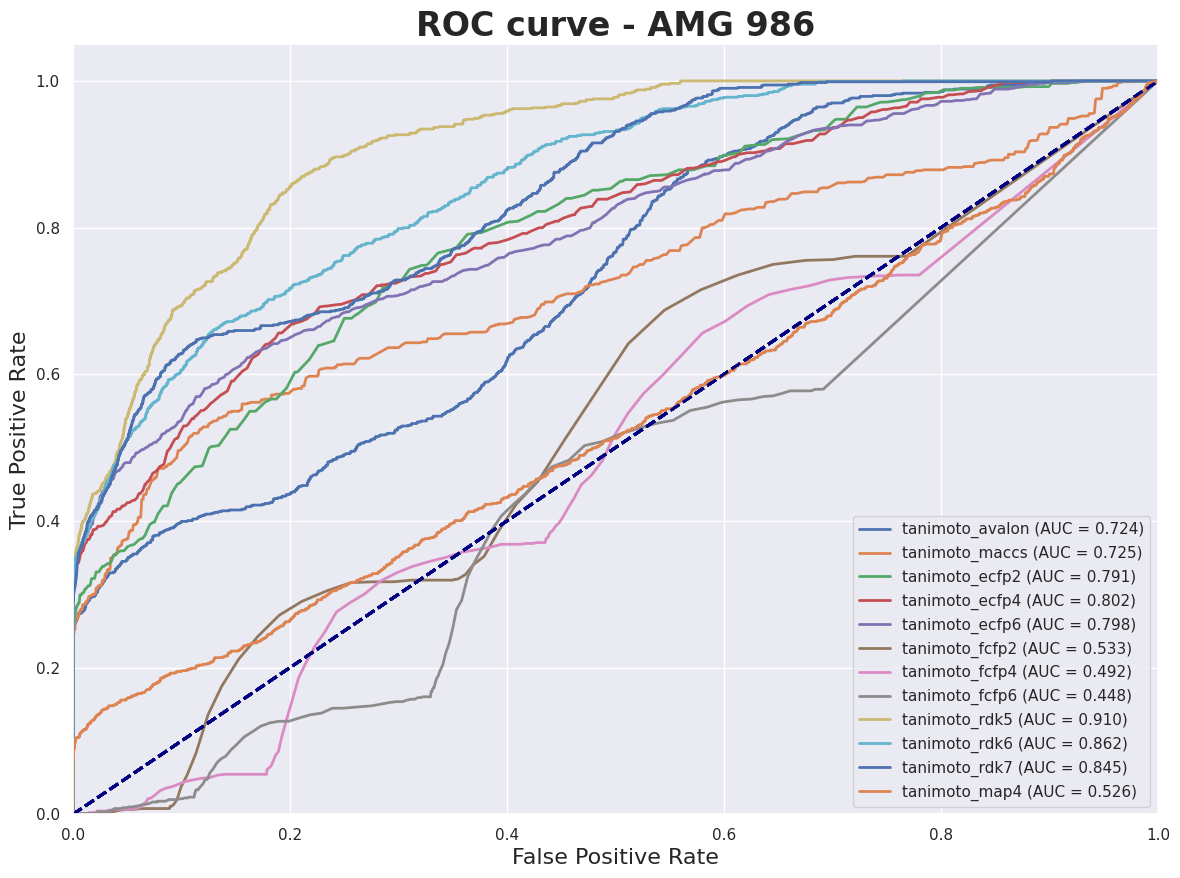

<Figure size 1400x1000 with 0 Axes>

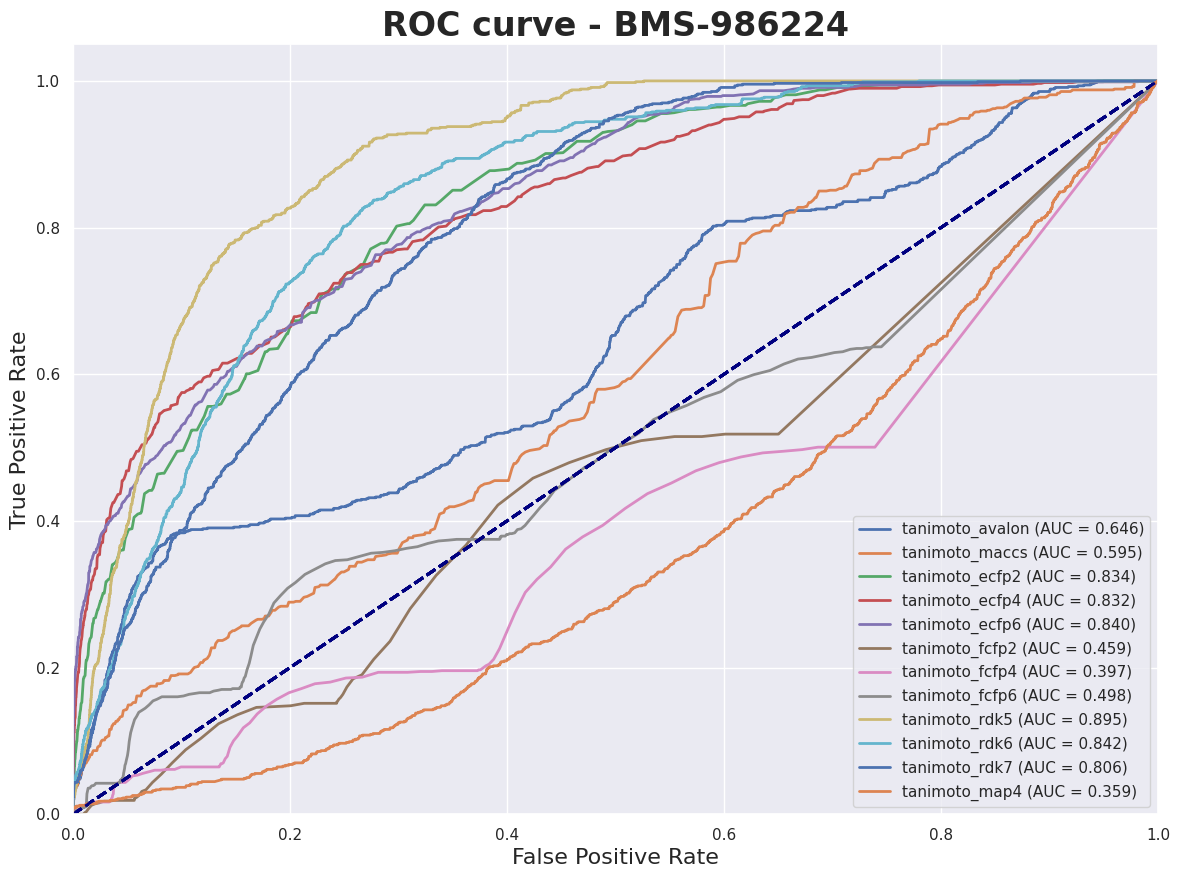

In [7]:
path = '/home/labhhc/Documents/Workspace/D18/TrucD18/Similarity/Data/Raw_data'
for i in query:
    data = pd.read_csv(path+f'/{i.GetProp("_Name")}.csv')
    valid = similarity_validation(data, active_col = 'Active', scores = 'tanimoto',plot_type = 'roc', figsize = (14,10), query =i )
    valid.validation()
    valid.visualize()

# 4. Cross-validation

## 4.1. Compare 12 fingerprint for 3 data sets

In [174]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score 
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve,average_precision_score
from sklearn.metrics import accuracy_score, make_scorer

from significantplot import sign_array, sign_table, sign_plot
import seaborn as sns
import matplotlib.pyplot as plt
def GH_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    specificity = recall_score(y_true, y_pred, pos_label=0)
    GH = (0.75*precision + 0.25*recall)*specificity
    return GH

GH_scoring = make_scorer(GH_score, greater_is_better=True)
col = ['Active','tanimoto_avalon',
 'tanimoto_maccs',
 'tanimoto_ecfp2',
 'tanimoto_ecfp4',
 'tanimoto_ecfp6',
 'tanimoto_fcfp2',
 'tanimoto_fcfp4',
 'tanimoto_fcfp6',
 'tanimoto_rdk5',
 'tanimoto_rdk6',
 'tanimoto_rdk7',
 'tanimoto_map4']

In [112]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
path = '/home/labhhc/Documents/Workspace/D18/TrucD18/Similarity/Data/Raw_data'
cv = RepeatedStratifiedKFold(n_repeats = 3, n_splits=10, random_state=42)
QUERY = []
list_AUC = []
list_F1 = []
list_GH = []

for i in query:
    QUERY.append(i)
    data = pd.read_csv(path+f'/{i.GetProp("_Name")}.csv')
    data = data[col]
    data_train, data_test = train_test_split(data, test_size=0.2, random_state=42, stratify = data.Active)
    for train_index, test_index in cv.split(data_train.drop(['Active'], axis =1), data_train['Active']):
        list_auc = []
        list_f1 = []
        list_gh = []
        model = []
        test = data_train.iloc[test_index,:]
        for i in col[1:]:
            model.append(i)
            fpr, tpr, _ = roc_curve(test['Active'], test[i])
            roc_auc = round(auc(fpr, tpr),3)
            list_auc.append(roc_auc)
            f1 = f1_score(test['Active'].values, test[i].round())
            list_f1.append(f1)
            gh = GH_score(test['Active'].values, test[i].round())
            list_gh.append(gh)
        list_AUC.append(list_auc)
        list_F1.append(list_f1)
        list_GH.append(list_gh)

In [127]:
AUC = pd.DataFrame(list_AUC, columns = model)
F1 = pd.DataFrame(list_F1, columns = model)
GH = pd.DataFrame(list_GH, columns = model)

In [182]:
CMF_019 = AUC.iloc[:30,:].reset_index(drop=True)
AMG_986 = AUC.iloc[30:60,:].reset_index(drop=True)
BMS_986224 = AUC.iloc[60:,:].reset_index(drop=True)

In [168]:
CMF_019.mean()

tanimoto_avalon    0.655067
tanimoto_maccs     0.549067
tanimoto_ecfp2     0.650667
tanimoto_ecfp4     0.624700
tanimoto_ecfp6     0.639200
tanimoto_fcfp2     0.390367
tanimoto_fcfp4     0.483633
tanimoto_fcfp6     0.512267
tanimoto_rdk5      0.491367
tanimoto_rdk6      0.585900
tanimoto_rdk7      0.689667
tanimoto_map4      0.373433
dtype: float64

(<AxesSubplot: title={'center': 'AUC-Wilcoxon - CMF-019'}>,
 <matplotlib.colorbar.Colorbar at 0x7f51d80710d0>)

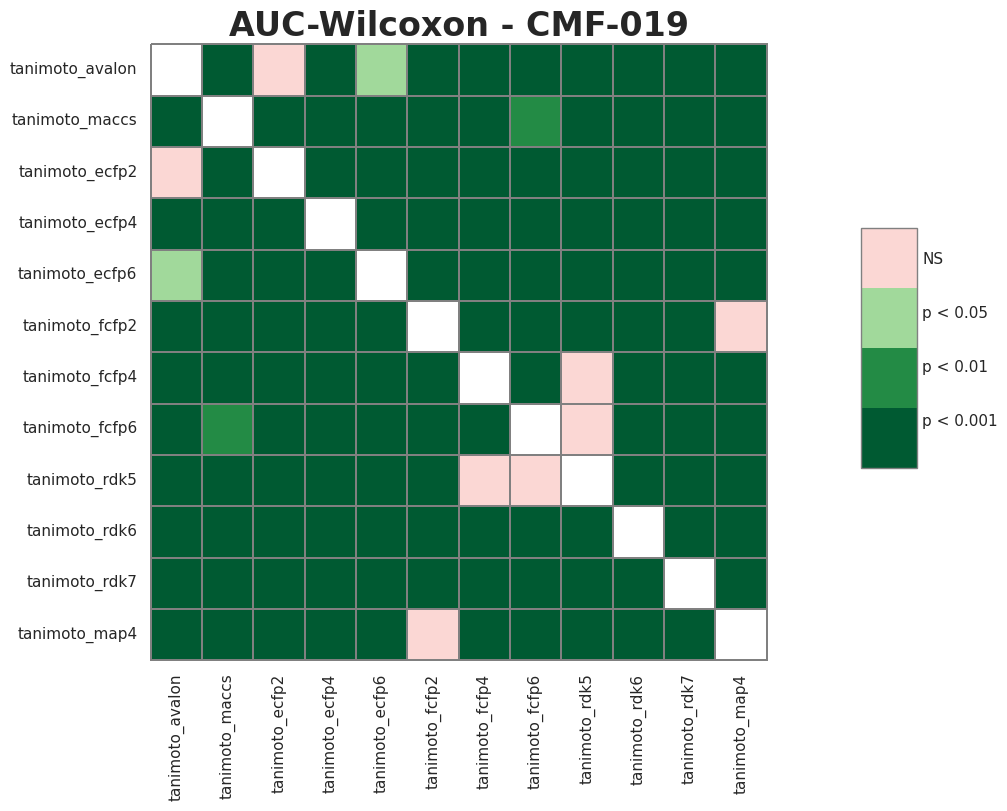

In [166]:
df_melt = pd.melt(CMF_019.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
pc =sp.posthoc_wilcoxon(df_melt, val_col='AUC', group_col='Model', p_adjust='holm')
plt.figure(figsize = (14,8))
plt.title("AUC-Wilcoxon - CMF-019", fontsize = 24, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)

In [169]:
AMG_986.mean()

tanimoto_avalon    0.728033
tanimoto_maccs     0.732933
tanimoto_ecfp2     0.795167
tanimoto_ecfp4     0.808233
tanimoto_ecfp6     0.803533
tanimoto_fcfp2     0.535367
tanimoto_fcfp4     0.489800
tanimoto_fcfp6     0.440100
tanimoto_rdk5      0.914033
tanimoto_rdk6      0.867633
tanimoto_rdk7      0.853633
tanimoto_map4      0.529367
dtype: float64

(<AxesSubplot: title={'center': 'AUC-Wilcoxon - AMG_986'}>,
 <matplotlib.colorbar.Colorbar at 0x7f51d7fbe7f0>)

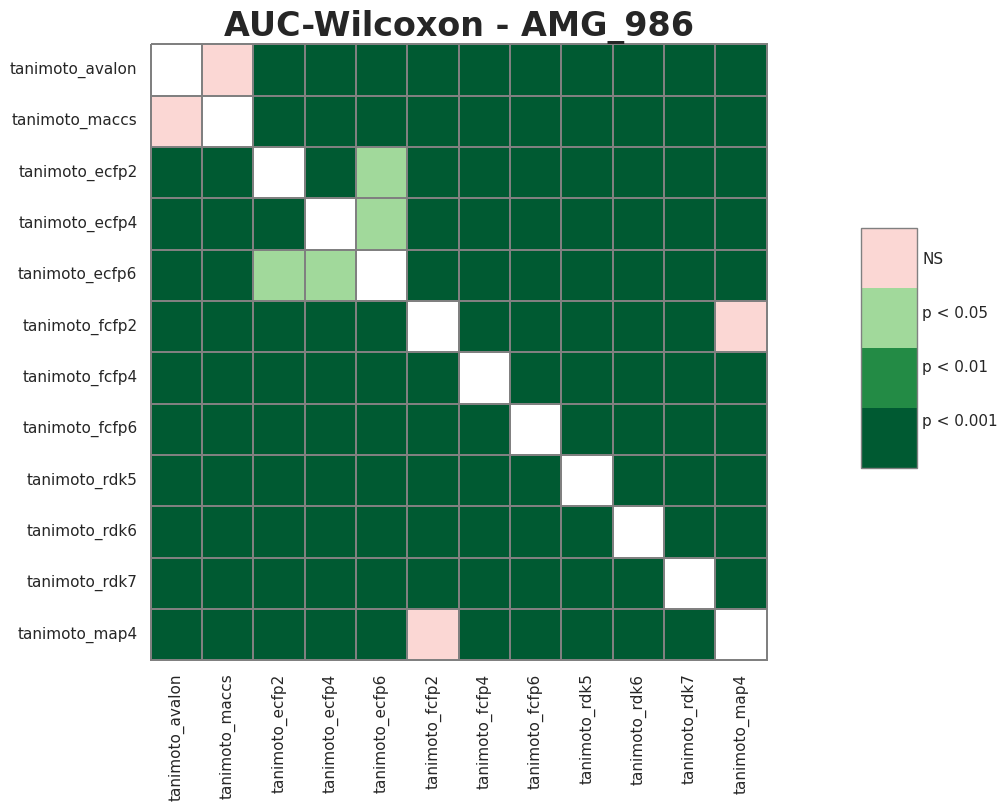

In [170]:
df_melt = pd.melt(AMG_986.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
pc =sp.posthoc_wilcoxon(df_melt, val_col='AUC', group_col='Model', p_adjust='holm')
plt.figure(figsize = (14,8))
plt.title("AUC-Wilcoxon - AMG_986", fontsize = 24, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)

In [171]:
BMS_986224.mean()

tanimoto_avalon    0.647567
tanimoto_maccs     0.600633
tanimoto_ecfp2     0.835000
tanimoto_ecfp4     0.831767
tanimoto_ecfp6     0.839733
tanimoto_fcfp2     0.459333
tanimoto_fcfp4     0.400933
tanimoto_fcfp6     0.504367
tanimoto_rdk5      0.897267
tanimoto_rdk6      0.846867
tanimoto_rdk7      0.811567
tanimoto_map4      0.357133
dtype: float64

(<AxesSubplot: title={'center': 'AUC-Wilcoxon - BMS_986224'}>,
 <matplotlib.colorbar.Colorbar at 0x7f51d7e96d60>)

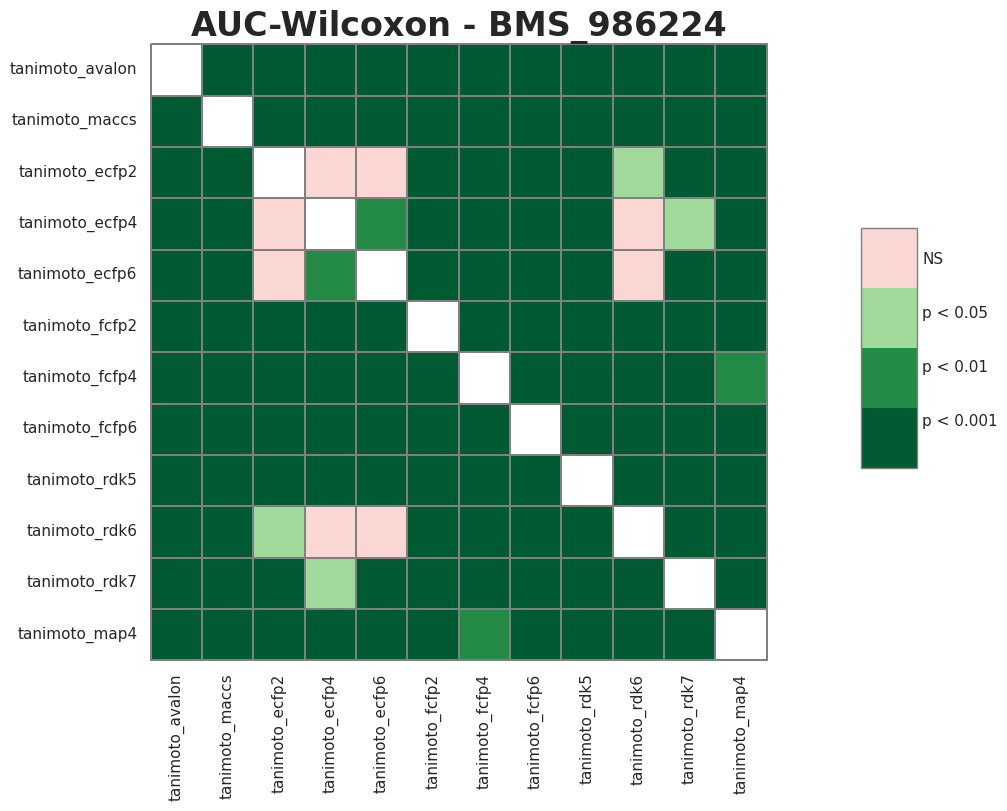

In [172]:
df_melt = pd.melt(BMS_986224.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
pc =sp.posthoc_wilcoxon(df_melt, val_col='AUC', group_col='Model', p_adjust='holm')
plt.figure(figsize = (14,8))
plt.title("AUC-Wilcoxon - BMS_986224", fontsize = 24, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)

In [187]:
index = ['CMF_019_rdk7', 'AMG_986_rdk5', 'BMS_986224_rdk5']
list_compare = []
list_compare.append(CMF_019['tanimoto_rdk7'])
list_compare.append(AMG_986['tanimoto_rdk5'])
list_compare.append(BMS_986224['tanimoto_rdk5'])

In [193]:
df_compare = pd.DataFrame(list_compare, index = index).T

In [212]:
df_compare.columns

Index(['CMF_019_rdk7', 'AMG_986_rdk5', 'BMS_986224_rdk5'], dtype='object')

CMF_019_rdk7 vs. AMG_986_rdk5: Custom statistical test, P_val:1.863e-09
AMG_986_rdk5 vs. BMS_986224_rdk5: Custom statistical test, P_val:6.918e-06
CMF_019_rdk7 vs. BMS_986224_rdk5: Custom statistical test, P_val:1.863e-09


Text(0.5, 1.0, 'Stacking Method Comparision - Wilcoxon test')

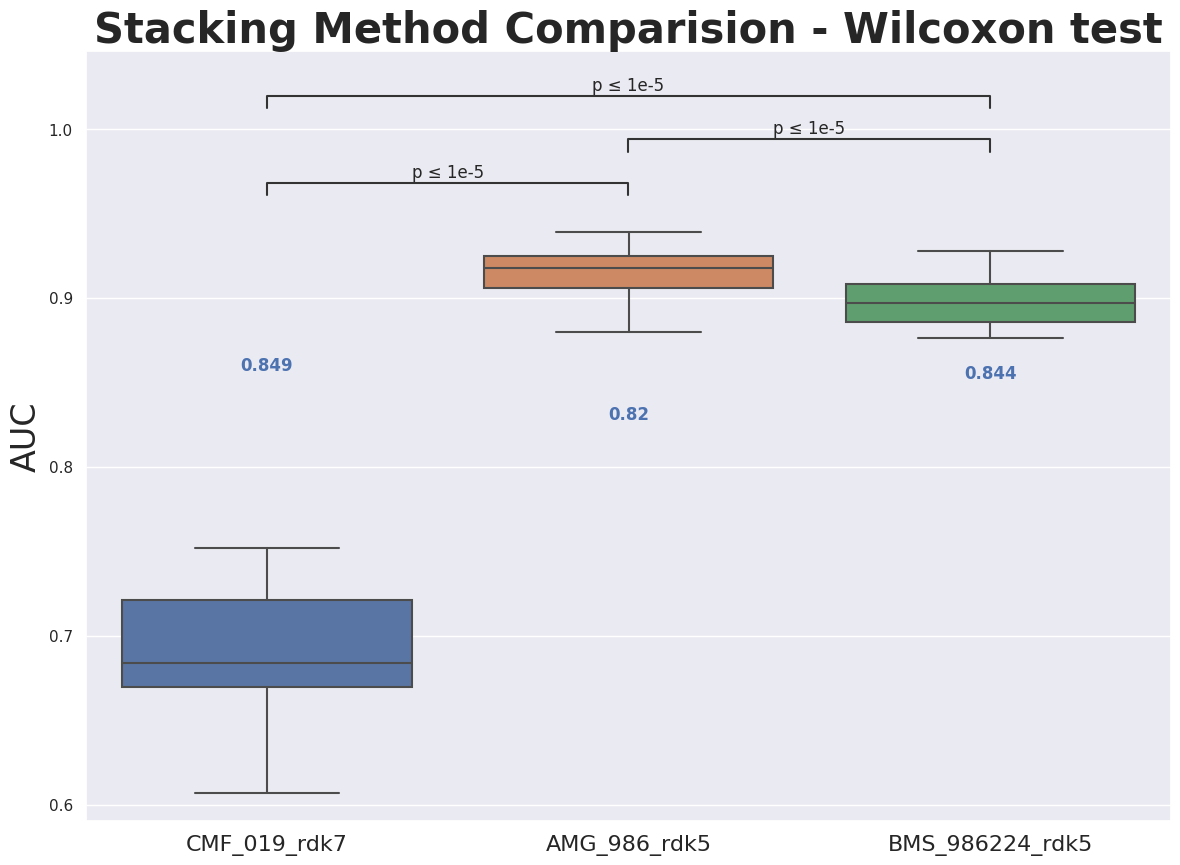

In [219]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(df_compare.reset_index(), id_vars=['index'], value_vars=df_compare.columns)
df_melt.columns = ['index', 'Model', 'AUC']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(df_compare['CMF_019_rdk7'].astype('float'), df_compare['AMG_986_rdk5'].astype('float'), alternative="two-sided"),
                wilcoxon(df_compare['AMG_986_rdk5'].astype('float'), df_compare['BMS_986224_rdk5'].astype('float'), alternative="two-sided"),
                wilcoxon(df_compare['CMF_019_rdk7'].astype('float'), df_compare['BMS_986224_rdk5'].astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stack.astype('float'), auc_stackvar.astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stackvar.astype('float'), global_auc_stackvar.astype('float'), alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'AUC',
    'palette': subcat_palette[1:]
}

pairs = [('CMF_019_rdk7', 'AMG_986_rdk5'),
         ('AMG_986_rdk5','BMS_986224_rdk5'),
         ('CMF_019_rdk7','BMS_986224_rdk5'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
plt.figure(figsize = (14,10))

ax = sns.boxplot(x='Model', y='AUC', data=df_melt)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)


mean = list()
result = df_compare.values
for i in range(len(result)):
    x = result[i].mean().round(3)
    mean.append(x)
data = np.array(mean)   
ser = pd.Series(data, index =df_compare.index)


dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.01

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='b',weight='semibold', fontsize = 12)
    

ax.set_ylabel('AUC', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = df_compare.columns, fontsize = 16)
ax.set_title("Stacking Method Comparision - Wilcoxon test",fontsize = 30, weight ='semibold')
#plt.savefig("/home/labhhc/Documents/Workspace/D18/TrucD18/stacking/Stacking AUC- cps25 - Wilocoxon.png", dpi = 600)

## 4.2. Fingerprint

In [221]:
AUC.mean()

tanimoto_avalon    0.676889
tanimoto_maccs     0.627544
tanimoto_ecfp2     0.760278
tanimoto_ecfp4     0.754900
tanimoto_ecfp6     0.760822
tanimoto_fcfp2     0.461689
tanimoto_fcfp4     0.458122
tanimoto_fcfp6     0.485578
tanimoto_rdk5      0.767556
tanimoto_rdk6      0.766800
tanimoto_rdk7      0.784956
tanimoto_map4      0.419978
dtype: float64

(<AxesSubplot: title={'center': 'AUC -Wilcoxon'}>,
 <matplotlib.colorbar.Colorbar at 0x7f51d5fe9850>)

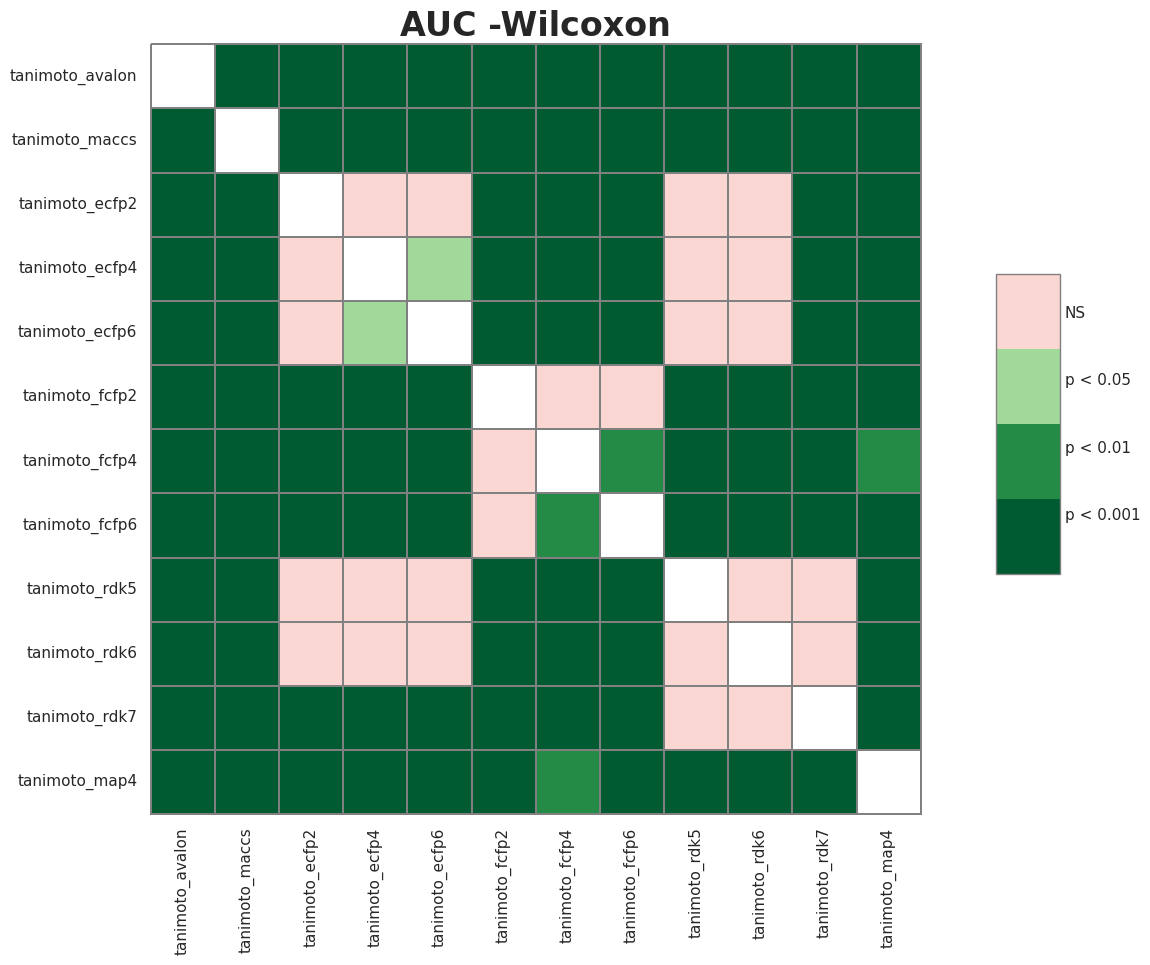

In [222]:
df_melt = pd.melt(AUC.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
pc =sp.posthoc_wilcoxon(df_melt, val_col='AUC', group_col='Model', p_adjust='holm')
plt.figure(figsize = (16,10))
plt.title("AUC -Wilcoxon", fontsize = 24, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)

## 4.3. Ensemble

In [ ]:
from rdkit import Chem, DataStructs
ensemble=[]
cp = []
for i in query:
    cp.append(i.GetProp("_Name"))
    fp = Chem.RDKFingerprint(i, maxPath=7, fpSize=4096, nBitsPerHash=2)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    ensemble.append(ar)
    
df_ensemble  =pd.DataFrame(ensemble, index = cp).T
df_ensemble

,CMF-019,AMG 986,BMS-986224
0,0,0,1
1,1,0,1
2,0,1,1
3,0,1,0
4,0,1,0
...,...,...,...
4091,0,1,1
4092,0,0,0
4093,0,1,1
4094,0,0,0


In [244]:
df_ensemble['CHA-1'].sum()

1465.0

In [245]:
df_ensemble['CHA'] = df_ensemble.sum(axis=1)

df_ensemble['CHA-1'] = np.zeros(df_ensemble.shape[0])
df_ensemble['CHA-1'][df_ensemble['CHA']>=1] =1

df_ensemble['CHA-2'] = np.zeros(df_ensemble.shape[0])
df_ensemble['CHA-2'][df_ensemble['CHA']>=2] =1

df_ensemble['CHA-3'] = np.zeros(df_ensemble.shape[0])
df_ensemble['CHA-3'][df_ensemble['CHA']>=3] =1

In [246]:
df_ensemble

,CMF-019,AMG 986,BMS-986224,CHA,CHA-1,CHA-2,CHA-3
0,0,0,1,2.0,1.0,1.0,0.0
1,1,0,1,5.0,1.0,1.0,1.0
2,0,1,1,5.0,1.0,1.0,1.0
3,0,1,0,2.0,1.0,1.0,0.0
4,0,1,0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
4091,0,1,1,5.0,1.0,1.0,1.0
4092,0,0,0,0.0,0.0,0.0,0.0
4093,0,1,1,5.0,1.0,1.0,1.0
4094,0,0,0,0.0,0.0,0.0,0.0


In [243]:
df_ensemble['CHA-1'] = np.zeros(df_ensemble.shape[0])
df_ensemble['CHA-1'][df_ensemble['CHA']>1] =1

In [ ]:
def ensemble_fp(self):
        
        # Ensemble

     
        self.active_data['fp'] = self.active_data[self.mol_col].apply(self.mol2ecfp)
        X = np.stack(self.active_data['fp'])
        self.df_ensemble = pd.DataFrame()
        
        for i in range(X.shape[0]):
            en_fp = X.sum(axis = 0)
            en_fp[en_fp > i] = 1

            arr_tostring = "".join(en_fp.astype(str))
            arr_tostring

            # Chuyển string của 0, 1 thành ExplicitVBitVect, cái này cũng dùng cho tanimoto được luôn
            EBitVect = DataStructs.cDataStructs.CreateFromBitString(arr_tostring)
            df_EBitVect = pd.DataFrame([EBitVect])
            df_EBitVect.columns = [f'Ensemble_{i}']
            self.df_ensemble = pd.concat([self.df_ensemble,df_EBitVect.T], axis=0)
        
        self.df_ensemble.columns = ['Ensemble method']
        self.df_ensemble['ID'] = self.df_ensemble.index

In [234]:
for i in range(X.shape[0]):
            en_fp = X.sum(axis = 0)
            en_fp[en_fp > i] = 1

            arr_tostring = "".join(en_fp.astype(str))
            arr_tostring

            # Chuyển string của 0, 1 thành ExplicitVBitVect, cái này cũng dùng cho tanimoto được luôn
            EBitVect = DataStructs.cDataStructs.CreateFromBitString(arr_tostring)
            df_EBitVect = pd.DataFrame([EBitVect])
            df_EBitVect.columns = [f'Ensemble_{i}']
            self.df_ensemble = pd.concat([self.df_ensemble,df_EBitVect.T], axis=0)
        
        self.df_ensemble.columns = ['Ensemble method']
        self.df_ensemble['ID'] = self.df_ensemble.index

In [ ]:
rdk7_query = Chem.RDKFingerprint(self.query, maxPath=7, fpSize=4096, nBitsPerHash=2)

In [ ]:
 def ensemble_fp():
        
        # Ensemble

     
        self.active_data['fp'] = self.active_data['ROMol'].apply(self.mol2ecfp)
        X = np.stack(self.active_data['fp'])
        self.df_ensemble = pd.DataFrame()
        
        for i in range(X.shape[0]):
            en_fp = X.sum(axis = 0)
            en_fp[en_fp > i] = 1

            arr_tostring = "".join(en_fp.astype(str))
            arr_tostring

            # Chuyển string của 0, 1 thành ExplicitVBitVect, cái này cũng dùng cho tanimoto được luôn
            EBitVect = DataStructs.cDataStructs.CreateFromBitString(arr_tostring)
            df_EBitVect = pd.DataFrame([EBitVect])
            df_EBitVect.columns = [f'Ensemble_{i}']
            self.df_ensemble = pd.concat([self.df_ensemble,df_EBitVect.T], axis=0)
        
        self.df_ensemble.columns = ['Ensemble method']
        self.df_ensemble['ID'] = self.df_ensemble.index

# 5. Stacking

In [251]:
from sklearn.model_selection import cross_val_score
import numpy as np 
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_repeats = 3, n_splits=10, random_state=42)
clf = XGBClassifier(random_state=42)

In [252]:
model = []
list_auc = []
list_f1 = []
list_GH = []
list_recall = []
path = '/home/labhhc/Documents/Workspace/D18/TrucD18/Similarity/Data/Raw_data'
for i in query:
    clf = XGBClassifier(random_state=42)
    data = pd.read_csv(path+f'/{i.GetProp("_Name")}.csv')
    data = data[col]
    display(data.head(2))
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['Active'], axis = 1), 
                                                    data.Active, test_size=0.2, random_state=42, stratify = data.Active)
    
    auc= cross_val_score(clf, X_train, y_train, cv=cv, scoring ='roc_auc')
    list_auc.append(auc)

    f1 = cross_val_score(clf, X_train, y_train, cv=cv, scoring ='f1')
    list_f1.append(f1)
    
    recall = cross_val_score(clf, X_train, y_train, cv=cv, scoring ='recall')
    list_recall.append(recall)
    
    GH = cross_val_score(clf, X_train, y_train, cv=cv, scoring =GH_scoring)
    list_GH.append(GH)
    
    model.append(i.GetProp('_Name'))


,Active,tanimoto_avalon,tanimoto_maccs,tanimoto_ecfp2,tanimoto_ecfp4,tanimoto_ecfp6,tanimoto_fcfp2,tanimoto_fcfp4,tanimoto_fcfp6,tanimoto_rdk5,tanimoto_rdk6,tanimoto_rdk7,tanimoto_map4
0,1,0.874667,0.859375,0.680851,0.554217,0.441667,0.045455,0.017241,0.012739,0.947826,0.929319,0.908575,0.535484
1,1,0.973837,0.883333,0.790698,0.763889,0.717172,0.046875,0.017544,0.026316,0.988713,0.976744,0.966343,0.838870


,Active,tanimoto_avalon,tanimoto_maccs,tanimoto_ecfp2,tanimoto_ecfp4,tanimoto_ecfp6,tanimoto_fcfp2,tanimoto_fcfp4,tanimoto_fcfp6,tanimoto_rdk5,tanimoto_rdk6,tanimoto_rdk7,tanimoto_map4
0,1,0.406015,0.423913,0.190476,0.106195,0.075472,0.030303,0.008772,0.006173,0.198582,0.284733,0.257212,0.431844
1,1,0.379048,0.388889,0.177419,0.098214,0.076923,0.031250,0.008929,0.012658,0.197842,0.273287,0.252649,0.409420


,Active,tanimoto_avalon,tanimoto_maccs,tanimoto_ecfp2,tanimoto_ecfp4,tanimoto_ecfp6,tanimoto_fcfp2,tanimoto_fcfp4,tanimoto_fcfp6,tanimoto_rdk5,tanimoto_rdk6,tanimoto_rdk7,tanimoto_map4
0,1,0.375000,0.453488,0.179104,0.110169,0.093168,0.028571,0.0,0.011976,0.200237,0.279346,0.264028,0.450057
1,1,0.355805,0.451220,0.184615,0.112069,0.074534,0.014493,0.0,0.006061,0.196643,0.270068,0.252914,0.449631


In [253]:
AUC = pd.DataFrame(list_auc, index =  model).T
F1 = pd.DataFrame(list_f1, index =  model).T
GH = pd.DataFrame(list_GH, index =  model).T
RECALL = pd.DataFrame(list_recall, index =  model).T

CMF-019 vs. AMG 986: Custom statistical test, P_val:9.301e-03
AMG 986 vs. BMS-986224: Custom statistical test, P_val:4.971e-02
CMF-019 vs. BMS-986224: Custom statistical test, P_val:1.639e-07


Text(0.5, 1.0, 'Stacking Method Comparision - Wilcoxon test')

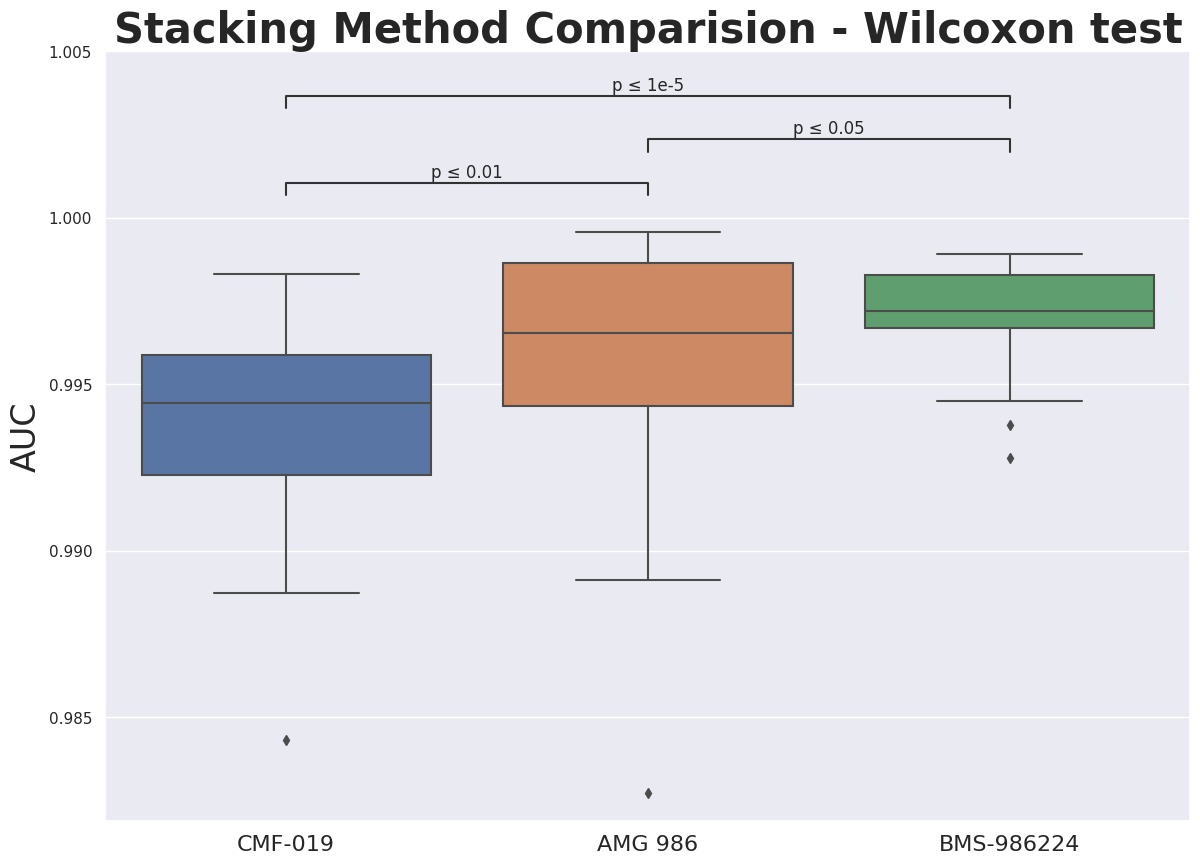

In [254]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(AUC.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(AUC['CMF-019'].astype('float'), AUC['AMG 986'].astype('float'), alternative="two-sided"),
                wilcoxon(AUC['AMG 986'].astype('float'), AUC['BMS-986224'].astype('float'), alternative="two-sided"),
                wilcoxon(AUC['CMF-019'].astype('float'), AUC['BMS-986224'].astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stack.astype('float'), auc_stackvar.astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stackvar.astype('float'), global_auc_stackvar.astype('float'), alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'AUC',
    'palette': subcat_palette[1:]
}

pairs = [('CMF-019', 'AMG 986'),
         ('AMG 986','BMS-986224'),
         ('CMF-019','BMS-986224'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
plt.figure(figsize = (14,10))

ax = sns.boxplot(x='Model', y='AUC', data=df_melt)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)
ax.set_ylabel('AUC', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = model, fontsize = 16)
ax.set_title("Stacking Method Comparision - Wilcoxon test",fontsize = 30, weight ='semibold')
#plt.savefig("/home/labhhc/Documents/Workspace/D18/TrucD18/stacking/Stacking AUC- cps25 - Wilocoxon.png", dpi = 600)

CMF-019 vs. AMG 986: Custom statistical test, P_val:1.304e-07
AMG 986 vs. BMS-986224: Custom statistical test, P_val:3.044e-01
CMF-019 vs. BMS-986224: Custom statistical test, P_val:1.863e-09


Text(0.5, 1.0, 'Stacking Method Comparision - Wilcoxon test')

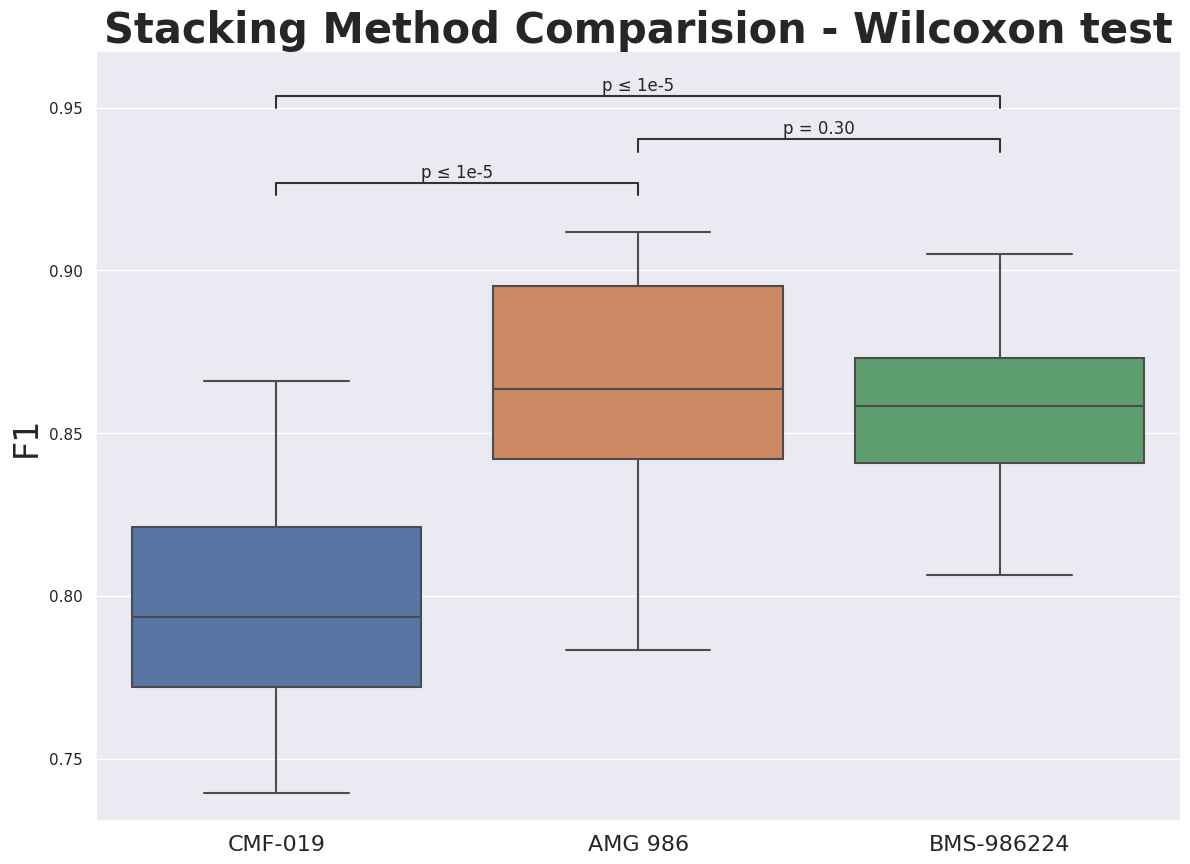

In [256]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(F1.reset_index(), id_vars=['index'], value_vars=F1.columns)
df_melt.columns = ['index', 'Model', 'F1']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(F1['CMF-019'].astype('float'), F1['AMG 986'].astype('float'), alternative="two-sided"),
                wilcoxon(F1['AMG 986'].astype('float'), F1['BMS-986224'].astype('float'), alternative="two-sided"),
                wilcoxon(F1['CMF-019'].astype('float'), F1['BMS-986224'].astype('float'), alternative="two-sided"),
                
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'F1',
    'palette': subcat_palette[1:]
}

pairs = [('CMF-019', 'AMG 986'),
         ('AMG 986','BMS-986224'),
         ('CMF-019','BMS-986224'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
plt.figure(figsize = (14,10))

ax = sns.boxplot(x='Model', y='F1', data=df_melt)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)
ax.set_ylabel('F1', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = model, fontsize = 16)
ax.set_title("Stacking Method Comparision - Wilcoxon test",fontsize = 30, weight ='semibold')
#plt.savefig("/home/labhhc/Documents/Workspace/D18/TrucD18/stacking/Stacking AUC- cps25 - Wilocoxon.png", dpi = 600)

CMF-019 vs. AMG 986: Custom statistical test, P_val:1.192e-06
AMG 986 vs. BMS-986224: Custom statistical test, P_val:3.044e-01
CMF-019 vs. BMS-986224: Custom statistical test, P_val:1.061e-05


Text(0.5, 1.0, 'Stacking Method Comparision - Wilcoxon test')

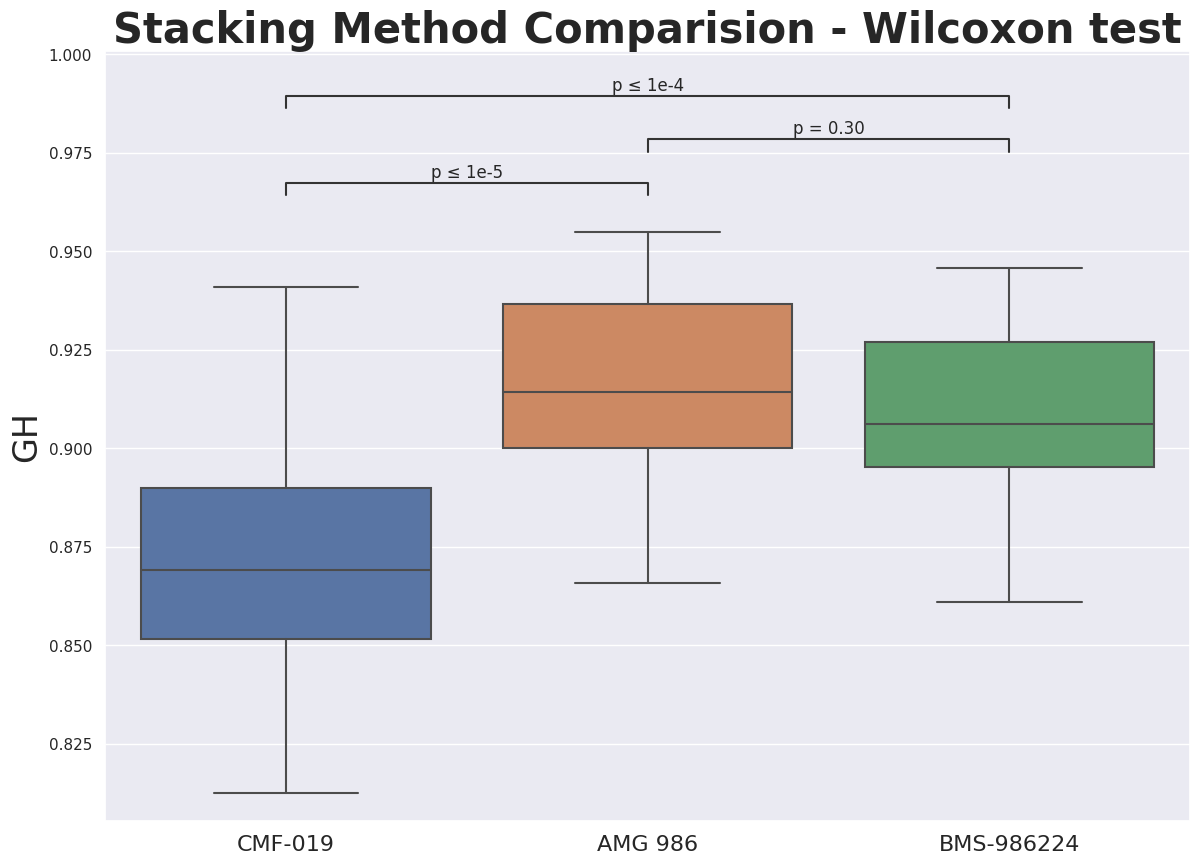

In [257]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(GH.reset_index(), id_vars=['index'], value_vars=GH.columns)
df_melt.columns = ['index', 'Model', 'GH']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(GH['CMF-019'].astype('float'), GH['AMG 986'].astype('float'), alternative="two-sided"),
                wilcoxon(GH['AMG 986'].astype('float'), GH['BMS-986224'].astype('float'), alternative="two-sided"),
                wilcoxon(GH['CMF-019'].astype('float'), GH['BMS-986224'].astype('float'), alternative="two-sided"),
                
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'GH',
    'palette': subcat_palette[1:]
}

pairs = [('CMF-019', 'AMG 986'),
         ('AMG 986','BMS-986224'),
         ('CMF-019','BMS-986224'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
plt.figure(figsize = (14,10))

ax = sns.boxplot(x='Model', y='GH', data=df_melt)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)
ax.set_ylabel('GH', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = model, fontsize = 16)
ax.set_title("Stacking Method Comparision - Wilcoxon test",fontsize = 30, weight ='semibold')
#plt.savefig("/home/labhhc/Documents/Workspace/D18/TrucD18/stacking/Stacking AUC- cps25 - Wilocoxon.png", dpi = 600)

# 6. Optimization

- AMG 986

# 7. Internal comparison

- AMG_986_RDK7
- Ensemble
- Stacking - AMG 986
- Optimization

# 8. External